In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### # 특이사항 메모

markdown 구조
- 1. 데이터 로드 (발표물_샘플과 동일)
- 2. 데이터 구조 및 기초 통계 확인 (발표물_샘플과 동일)
- 3. 결측치 및 이상치 탐색 (발표물_샘플과 동일)
- review_scores_~ 칼럼 간 상관관계 분석
- review_scores_rating 결측치 처리 (코드셀x)
- bathrooms, bedrooms, beds 이상치 처리
- 가격 이상치 (임시) 처리
- 위도, 경도별 가격 관찰


---

### 주제2 - 숙소의 여러 조건에 따른 숙소 가격 예측

##### # 1. 데이터 로드

In [123]:

df = pd.read_csv('./data/listings.csv.gz', compression='gzip')

In [65]:
# 'price_float' 컬럼에서 '$'와 ',' 제거
df['price'] = df['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# 컬럼 타입 변경
df['price'] = df['price'].astype(float)

##### # 2. 데이터 구조 및 기초 통계 확인

In [124]:
# 전체 컬럼 리스트
# 회의롤 통해 1차적으로 필요/불필요 컬럼을 구별
# 주석처리 = 필요한 컬럼

drop_list = [
'id',	                                        # 각 숙소의 고유 식별자.
'listing_url',	                                # 숙소의 웹페이지 URL.
'scrape_id',	                                # 데이터 스크래핑 작업의 고유 식별자.
'last_scraped',	                                # 숙소 정보가 마지막으로 스크래핑된 날짜.
'source',	                                    # 숙소 정보의 출처.
'name',	                                        # 숙소의 이름.
'description',	                                # 숙소에 대한 상세 설명.
'neighborhood_overview',	                    # 숙소 주변 지역에 대한 설명.
'picture_url',	                                # 숙소 대표 사진의 URL.
'host_id',	                                    # 호스트의 고유 식별자.
'host_url',	                                    # 호스트의 웹페이지 URL.
'host_name',	                                # 호스트의 이름.
'host_since',	                                # 호스트가 에어비앤비에 가입한 날짜.
'host_location',	                            # 호스트의 위치.
'host_about',	                                # 호스트에 대한 자기소개.
'host_response_time',	                        # 호스트의 평균 응답 시간.
'host_response_rate',	                        # 호스트의 응답률.
'host_acceptance_rate',	                        # 호스트의 예약 수락률.
'host_is_superhost',	                        # 호스트가 슈퍼호스트인지 여부.
'host_thumbnail_url',	                        # 호스트 프로필 썸네일 이미지의 URL.
'host_picture_url',	                            # 호스트 프로필 사진의 URL.
'host_neighbourhood',	                        # 호스트가 거주하는 지역.
'host_listings_count',	                        # 해당 호스트가 보유한 전체 숙소 수.
'host_total_listings_count',	                # 해당 호스트가 소유하거나 관리하는 전체 숙소 수.
'host_verifications',	                        # 호스트의 인증 정보 목록.
'host_has_profile_pic',	                        # 호스트가 프로필 사진을 가지고 있는지 여부.
'host_identity_verified',	                    # 호스트 신원이 인증되었는지 여부.
'neighbourhood',	                            # 숙소가 위치한 지역의 이름.

# 'neighbourhood_cleansed',	                    # 정제된 숙소 지역 이름.

'neighbourhood_group_cleansed',	                # 정제된 숙소 지역 그룹 이름.

# 'latitude',	                                    # 숙소의 위도.
# 'longitude',	                                # 숙소의 경도.
# 'property_type',	                            # 숙소의 종류.
# 'room_type',	                                # 숙소의 방 유형.
# 'accommodates',	                                # 숙소가 수용 가능한 최대 인원 수.
# 'bathrooms',	                                # 숙소의 욕실 개수.

'bathrooms_text',	                            # 숙소의 욕실 개수를 설명하는 텍스트.

# 'bedrooms',	                                    # 숙소의 침실 개수.
# 'beds',	                                        # 숙소의 침대 개수.
# 'amenities',	                                # 숙소에 제공되는 편의 시설 목록.
# 'price',	                                    # 숙소의 1박당 가격.

'minimum_nights',	                            # 최소 숙박 가능 일수.
'maximum_nights',	                            # 최대 숙박 가능 일수.
'minimum_minimum_nights',	                    # 호스트가 설정한 최소 숙박 일수 중 가장 낮은 값.
'maximum_minimum_nights',	                    # 호스트가 설정한 최소 숙박 일수 중 가장 높은 값.
'minimum_maximum_nights',	                    # 호스트가 설정한 최대 숙박 일수 중 가장 낮은 값.
'maximum_maximum_nights',	                    # 호스트가 설정한 최대 숙박 일수 중 가장 높은 값.
'minimum_nights_avg_ntm',	                    # 최소 숙박 일수의 평균값.
'maximum_nights_avg_ntm',	                    # 최대 숙박 일수의 평균값.
'calendar_updated',	                            # 달력이 마지막으로 업데이트된 시점.
'has_availability',	                            # 숙소 예약 가능 여부.
'availability_30',	                            # 향후 30일 동안의 숙소 예약 가능 일수.
'availability_60',	                            # 향후 60일 동안의 숙소 예약 가능 일수.
'availability_90',	                            # 향후 90일 동안의 숙소 예약 가능 일수.
'availability_365',	                            # 향후 365일 동안의 숙소 예약 가능 일수.
'calendar_last_scraped',	                    # 달력 정보가 마지막으로 스크래핑된 날짜.

# 'number_of_reviews',	                        # 총 리뷰 개수.
# 'number_of_reviews_ltm',	                    # 지난 12개월 동안의 리뷰 개수.
# 'number_of_reviews_l30d',	                    # 지난 30일 동안의 리뷰 개수.

'availability_eoy',	                            # 연말까지의 예약 가능 일수.

# 'number_of_reviews_ly',	                        # 지난 1년 동안의 리뷰 개수.

'estimated_occupancy_l365d',	                # 지난 365일 동안의 예상 점유율.
'estimated_revenue_l365d',	                    # 지난 365일 동안의 예상 수입.

# 'first_review',	                                # 첫 번째 리뷰가 작성된 날짜.
# 'last_review',	                                # 마지막 리뷰가 작성된 날짜.
# 'review_scores_rating',	                        # 총 리뷰 점수(별점)의 평균값.
# 'review_scores_accuracy',	                    # 정확도 리뷰 점수.
# 'review_scores_cleanliness',	                # 청결도 리뷰 점수.
# 'review_scores_checkin',	                    # 체크인 경험 리뷰 점수.
# 'review_scores_communication',	                # 소통 리뷰 점수.
# 'review_scores_location',	                    # 위치 리뷰 점수.
# 'review_scores_value',	                        # 가격 대비 가치 리뷰 점수.

'license',	                                    # 숙소의 라이선스 정보.
'instant_bookable',	                            # 즉시 예약이 가능한 숙소인지 여부.
'calculated_host_listings_count',	            # 호스트가 등록한 숙소 개수.
'calculated_host_listings_count_entire_homes',	# 호스트가 등록한 '전체 숙소/아파트' 유형의 개수.
'calculated_host_listings_count_private_rooms',	# 호스트가 등록한 '개인실' 유형의 개수.
'calculated_host_listings_count_shared_rooms',	# 호스트가 등록한 '공용 공간' 유형의 개수.
'reviews_per_month'	                            # 월별 평균 리뷰 개수.
]

# 불필요 컬럼 드롭 처리
df_listings = df.drop(drop_list, axis=1)



In [5]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25297 entries, 0 to 25296
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   neighbourhood_cleansed       25297 non-null  object 
 1   latitude                     25297 non-null  float64
 2   longitude                    25297 non-null  float64
 3   property_type                25297 non-null  object 
 4   room_type                    25297 non-null  object 
 5   accommodates                 25297 non-null  int64  
 6   bathrooms                    23253 non-null  float64
 7   bedrooms                     25040 non-null  float64
 8   beds                         23255 non-null  float64
 9   amenities                    25297 non-null  object 
 10  price                        23260 non-null  object 
 11  number_of_reviews            25297 non-null  int64  
 12  number_of_reviews_ltm        25297 non-null  int64  
 13  number_of_review

### # 3. 결측치 및 이상치 탐색

In [6]:
df_listings.isna().sum()

#
# bathrooms                      2044     👈 결측치 있음
# bedrooms                        257     👈 결측치 있음
# beds                           2042     👈 결측치 있음

# price                          2037     👈 결측치 있음

# first_review                   3573     👈 결측치 있음
# last_review                    3573     👈 결측치 있음
# review_scores_rating           3573     👈 결측치 있음
#

neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                      2044
bedrooms                        257
beds                           2042
amenities                         0
price                          2037
number_of_reviews                 0
number_of_reviews_ltm             0
number_of_reviews_l30d            0
number_of_reviews_ly              0
first_review                   3573
last_review                    3573
review_scores_rating           3573
review_scores_accuracy         3577
review_scores_cleanliness      3577
review_scores_checkin          3577
review_scores_communication    3577
review_scores_location         3577
review_scores_value            3577
dtype: int64

In [ ]:
# 추적용 price_text 컬럼 생성
df_listings['price_text'] = df_listings['price']

# 'price_float' 컬럼에서 '$'와 ',' 제거
df_listings['price'] = df_listings['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# 컬럼 타입 변경
df_listings['price'] = df_listings['price'].astype(float)

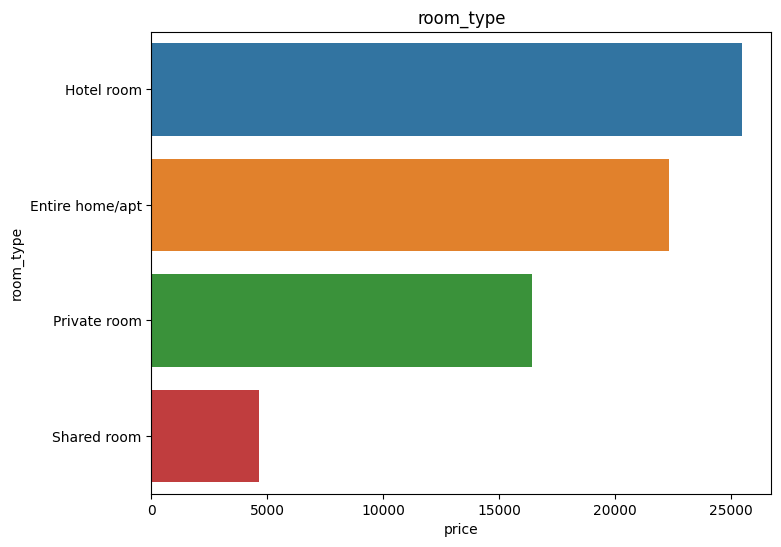

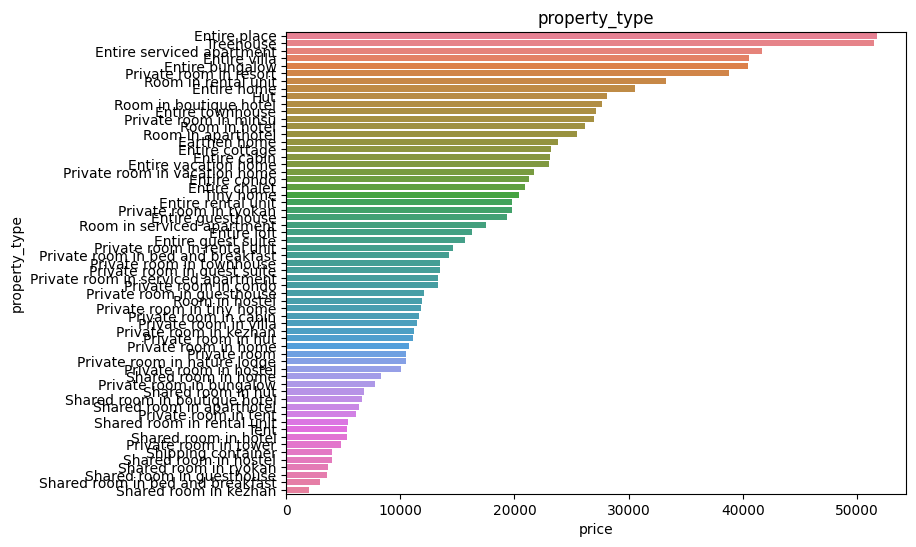

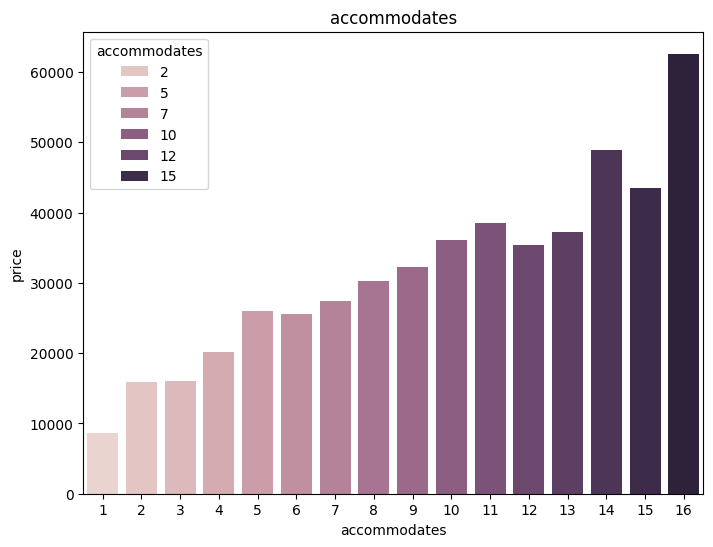

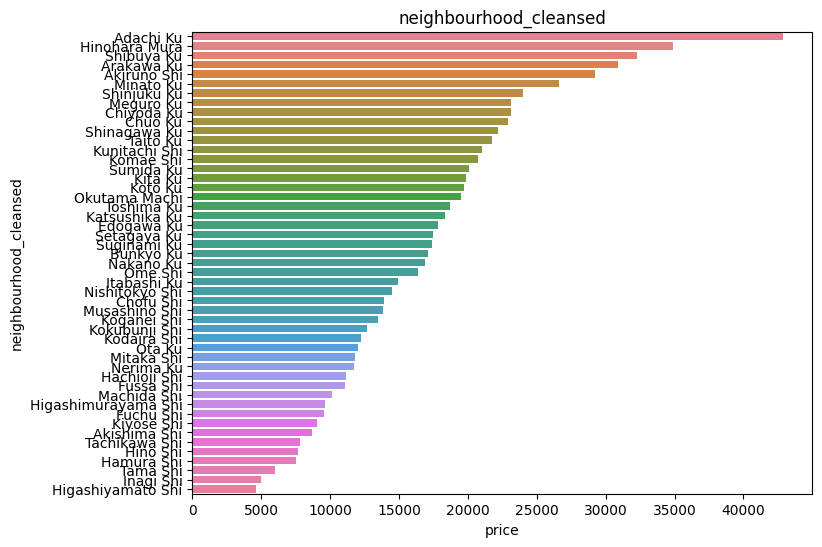

In [140]:
# price 결측치 처리를 위한 결측치가 없는 범례형

def show_plt(x, y, hue, title):
    plt.figure(figsize=(8,6))
    plt.title(title)
    sns.barplot(
        x=x,
        y=y,
        hue=hue
    )

rt_price = df_listings.groupby('room_type')['price'].mean().sort_values(ascending=False)
pt_price = df_listings.groupby('property_type')['price'].mean().sort_values(ascending=False)
acc_price = df_listings.groupby('accommodates')['price'].mean().sort_values(ascending=False)
nc_price = df_listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)

# rt_price.index

show_plt(rt_price, rt_price.index, rt_price.index, 'room_type')
show_plt(pt_price, pt_price.index, pt_price.index, 'property_type')
show_plt(acc_price.index, acc_price, acc_price.index, 'accommodates')
show_plt(nc_price, nc_price.index, nc_price.index, 'neighbourhood_cleansed')

In [127]:
# isna_cnt1 = df_listings['price'].isna().sum()
# print('결측치',isna_cnt1, '개 ')

groupby_columns = [
    ['room_type', 'property_type', 'accommodates', 'neighbourhood_cleansed'],
    ['room_type', 'property_type', 'accommodates'],
    ['room_type', 'accommodates'],
    ['room_type', 'property_type']
]

def fillna_groupby_mean_price(groupby_columns):

    def get_na_cnt():
        return df_listings['price'].isna().sum()

    print('최초 결측치', get_na_cnt(), '개 ')

    for gc in  groupby_columns:
        df_listings['price'] = df_listings['price'].fillna(
            df_listings.groupby(gc)['price'].transform('mean')
        )
        print('처리 후 결측치', get_na_cnt(), '개 ')


fillna_groupby_mean_price(groupby_columns)

최초 결측치 2037 개 
처리 후 결측치 175 개 
처리 후 결측치 26 개 
처리 후 결측치 2 개 
처리 후 결측치 0 개 


In [128]:
# 결측치 행 제거

_="""
아래 컬럼들의 결측치에 대해서 무조건적인 드롭을 하려 했으나
"정말 화장실, 침실이 없는 경우는 어떻게 하지?" 라는 생각이 들었음
일단 공동 작업을 위해 드롭은 하나. ML에서 평가가 낮게 나올경우 재고 하기로 함


bathrooms                      2044     👈 결측치 있음
bedrooms                        257     👈 결측치 있음
beds                           2042     👈 결측치 있음
"""

# bathrooms 결측치 있는 행 제거
df_listings = df_listings.dropna(subset=['bathrooms'])

# bedrooms 결측치 있는 행 제거
df_listings = df_listings.dropna(subset=['bedrooms'])

# beds 결측치 있는 행 제거
df_listings = df_listings.dropna(subset=['beds'])


df_listings.isna().sum()

neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
amenities                         0
price                             0
number_of_reviews                 0
number_of_reviews_ltm             0
number_of_reviews_l30d            0
number_of_reviews_ly              0
first_review                   3241
last_review                    3241
review_scores_rating           3241
review_scores_accuracy         3245
review_scores_cleanliness      3245
review_scores_checkin          3245
review_scores_communication    3245
review_scores_location         3245
review_scores_value            3245
price_text                        1
dtype: int64

### review_scores_~ 칼럼 간 상관관계 분석

1. 칼럼명부터 관계가 크게 있어 보여 heatmap으로 상관관계 시각화
2. 약 0.5~0.8로 굉장히 높은 양의 상관관계 보임
3. 대표값이라 할 수 있는 'review_scores_rating' 칼럼 제외 모두 제거

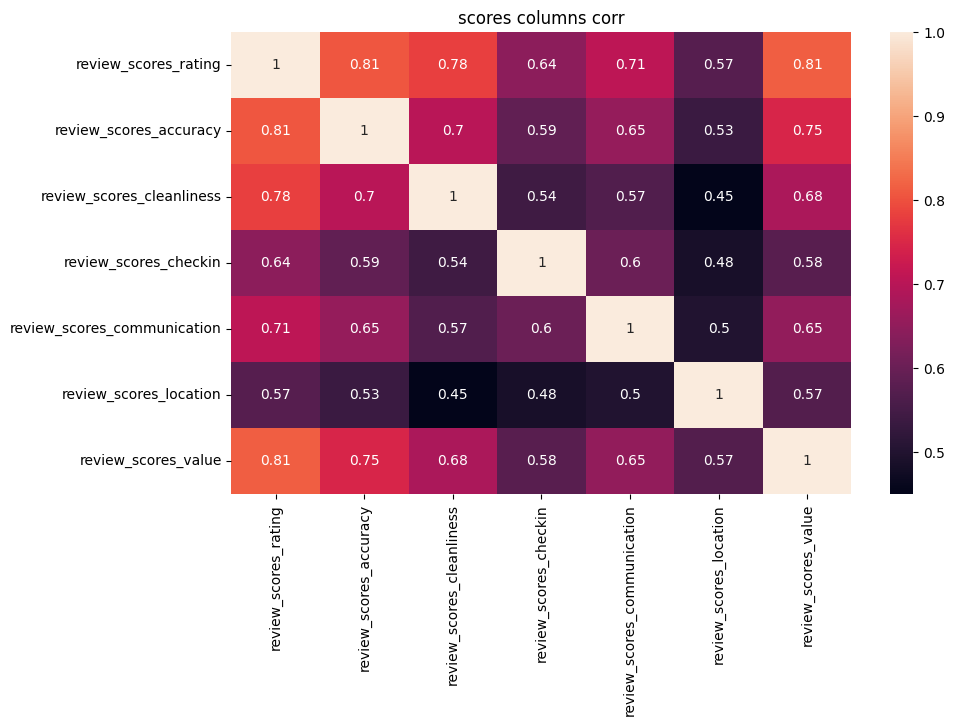

In [ ]:
# review score 칼럼 간의 상관관계 heatmap

df_scores = df_listings.filter(like='scores', axis=1)
# 평점 관련된 data만 추출

df_scores.dropna(inplace=True)
# NaN 모두 처리

corr = df_scores.corr()
# 상관계수 계산

# heatmap 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)
plt.title('review scores columns corr')
plt.show()

In [ ]:
# review_scores_rating 제외 평점 관련 칼럼 모두 제거

drop_scores_list = [
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]
df_listings = df_listings.drop(drop_scores_list, axis=1)

### review_scores_rating 결측치 처리

- 평점이 없다고 해서 해당 row의 피쳐-숙소값 데이터가 의미없는 것은 아니므로 일단 drop X (상관관계 분석 때만 잠깐 drop)

### bathrooms, bedrooms, beds 이상치 처리

최대수용인원1, 침대개수50인 이상치 몇 확인
- 처리 방법 1. host_id 조회 및 실제 웹사이트 확인해보니 host가 입력을 잘못한 것. -> 입력을 잘못한 해당 host의 row만 삭제? 기준 애매
- 처리 방법 2. (accommodates 기준 인당 사용 가능한 beds가 3개를 초과하는 row는 beds 값을 accommododates * 4 로 임의 조정?) 시도 X

In [118]:
# 먼저 bedrooms, beds 최댓값에 해당하는 row의 host_id로 accommodates, bathrooms, bedrooms, beds 확인 (대부분 domitory, 공동주택 등의 숙소)

df[(df['host_id']==12014384)|(df['host_id']==573624309)].loc[:, ['host_id', 'accommodates', 'bathrooms', 'bedrooms', 'beds']]

,host_id,accommodates,bathrooms,bedrooms,beds
1336,12014384,1,6.0,50.0,35.0
1411,12014384,3,6.0,36.0,50.0
2007,12014384,4,17.0,1.0,40.0
2008,12014384,5,7.0,30.0,13.0
2084,12014384,3,1.0,35.0,14.0
5073,12014384,3,1.5,1.0,8.0
13572,573624309,1,0.5,1.0,40.0
13573,573624309,2,1.0,1.0,40.0


In [16]:
# 두 호스트의 숙소 인덱스 추출
df[(df['host_id']==12014384)|(df['host_id']==573624309)].index

Index([1336, 1411, 2007, 2008, 2084, 5073, 13572, 13573], dtype='int64')

In [17]:
# 이상치 후보 제거
df_dummi = df_listings.drop(df[(df['host_id']==12014384)|(df['host_id']==573624309)].index, axis=0)

In [109]:
df_dummi.describe()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,review_scores_rating
count,23231.000000,23231.000000,23231.000000,23231.000000,23231.000000,23231.000000,2.323100e+04,23231.000000,23231.000000,23231.000000,23231.000000,19991.000000
mean,35.697989,139.736742,4.471783,1.154965,1.402178,2.925444,2.143252e+04,37.751969,14.665275,1.161121,11.702423,4.731179
std,0.043015,0.073176,2.939110,0.527999,0.964712,2.257306,8.398494e+04,67.475227,18.925337,1.724253,19.163364,0.322449
min,35.520940,139.081322,1.000000,0.000000,0.000000,0.000000,1.700000e+03,0.000000,0.000000,0.000000,0.000000,1.000000
25%,35.687038,139.698765,2.000000,1.000000,1.000000,1.000000,9.470000e+03,3.000000,2.000000,0.000000,0.000000,4.630000
50%,35.704226,139.727273,4.000000,1.000000,1.000000,2.000000,1.401500e+04,17.000000,10.000000,1.000000,5.000000,4.800000
75%,35.723866,139.794377,6.000000,1.000000,2.000000,4.000000,2.191800e+04,45.000000,21.000000,2.000000,18.000000,4.940000
max,35.840764,139.914020,16.000000,19.500000,13.000000,28.000000,8.711110e+06,3506.000000,827.000000,57.000000,834.000000,5.000000


### 가격 이상치 (임시) 처리

- 처리 방법 1. 인당 1박 숙박비가 200만원 이상인 숙소 제거(숙소값 예측을 필요로 하는 대상을 평범한 여행객으로 가정)
- 처리 방법 2. 상위 0.0045 row만 제거

In [ ]:
# 1. accommodates 기준으로 1인당 가격이 20만엔 이상인 row 조회(57개) -> 해당 row 제거
price_drop_index = df_listings[(df_listings['price']/df_listings['accommodates'])>=200000]['price'].index
df_filtered = df_listings.drop(price_drop_index, axis = 0)
df_filtered['price'].describe()

# 단점: max값이 999,999엔인 row 존재

count     23182.000000
mean      19484.154931
std       28940.080610
min        1700.000000
25%        9463.000000
50%       14000.000000
75%       21802.250000
max      999999.000000
Name: price, dtype: float64

In [138]:
# 2. 상위 0.0045인 row만 제거

price_percent = df_listings['price'].quantile(0.9955)
df_filtered = df_listings[df_listings['price'] <= price_percent]
df_filtered.describe()

# 단점: 퍼센트 설정 기준 애매

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price_text
count,23134.000000,23134.000000,23134.000000,23134.000000,23134.000000,23134.000000,23134.000000,23134.000000,23134.000000,23134.000000,23134.000000,19987.000000,19983.000000,19983.000000,19983.000000,19983.000000,19983.000000,19983.000000,23134.000000
mean,35.697907,139.736647,4.475880,1.156588,1.409181,2.937365,18445.565212,37.901919,14.719893,1.165298,11.747947,4.731303,4.768800,4.717593,4.793631,4.841084,4.718364,4.673323,18445.565212
std,0.043030,0.073205,2.938953,0.541017,1.080567,2.326728,16464.659272,67.572705,18.938067,1.725786,19.187444,0.321777,0.291374,0.348848,0.279907,0.262640,0.287964,0.332800,16464.659272
min,35.520940,139.081322,1.000000,0.000000,0.000000,0.000000,1700.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1700.000000
25%,35.686998,139.698767,2.000000,1.000000,1.000000,1.000000,9450.000000,3.000000,2.000000,0.000000,0.000000,4.630000,4.690000,4.610000,4.720000,4.790000,4.610000,4.570000,9450.000000
50%,35.704155,139.727209,4.000000,1.000000,1.000000,2.000000,13998.000000,18.000000,10.000000,1.000000,5.000000,4.800000,4.830000,4.800000,4.870000,4.910000,4.770000,4.730000,13998.000000
75%,35.723774,139.794190,6.000000,1.000000,2.000000,4.000000,21715.000000,45.000000,22.000000,2.000000,18.000000,4.940000,4.950000,4.940000,4.970000,5.000000,4.900000,4.870000,21715.000000
max,35.840764,139.914020,16.000000,19.500000,50.000000,50.000000,300000.000000,3506.000000,827.000000,57.000000,834.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,300000.000000


### 위도, 경도 위치별 가격 관찰
1. 숙소 위치에 따라 가격도 바뀔 것을 예상
2. 위도, 경도별 숙소값 평균으로 heatmap 시각화
3. 실제 지도와 비교했을 때 도심 부근이 평균값도 높은 것으로 확인
4. 숙소를 예측할 때는 정확한 위도, 경도값을 입력하지 않아서 ML때는 위도, 경도 칼럼보단 neighborhood cleansed 칼럼만 사용하면 될 것 같습니다

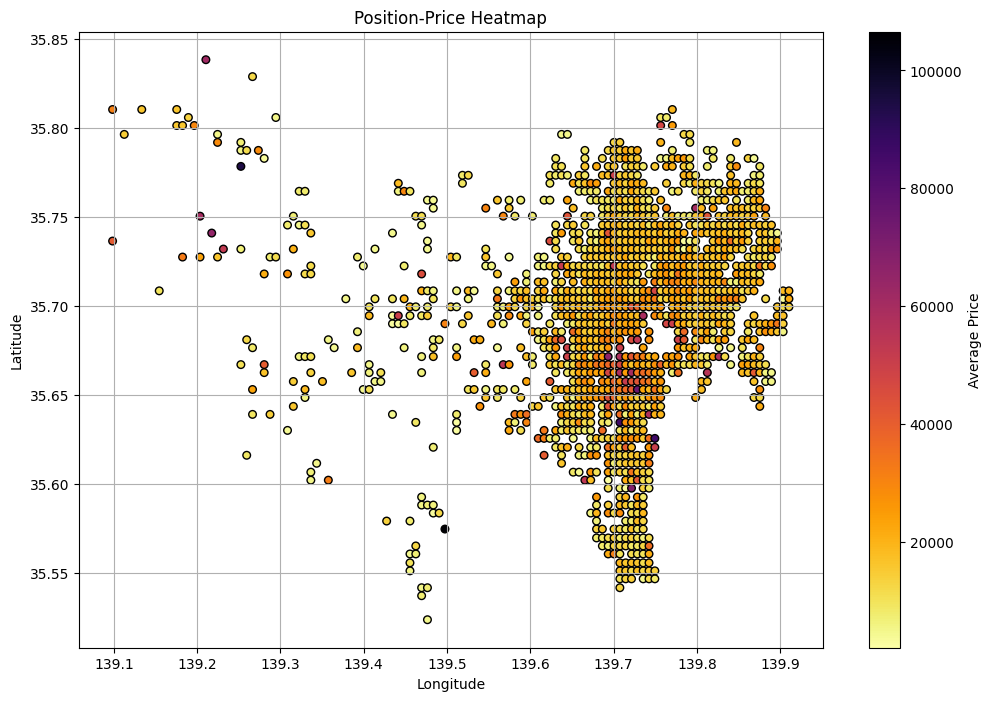

In [139]:
# 위도 경도에 따른 가격 변화 시각화
# price 이상치는 (2) percent=0.0045로 임시 처리

# 위도, 경도, 가격만 사용하므로 새 DataFrame에 저장
df_geo = df_filtered[['latitude', 'longitude', 'price']]

# 위도/경도 범위 자름
lat_bins = np.linspace(df_geo.iloc[:, 0].min(), df_geo.iloc[:, 0].max(), 70)
lon_bins = np.linspace(df_geo.iloc[:, 1].min(), df_geo.iloc[:, 1].max(), 120)

# 각 위도/경도 bin에 매핑
df_geo['lat_bin'] = pd.cut(df_geo.iloc[:, 0], bins=lat_bins)
df_geo['lon_bin'] = pd.cut(df_geo.iloc[:, 1], bins=lon_bins)

# 각 구간마다 평균 가격 계산
heatmap_data = (
    df_geo.groupby(['lat_bin', 'lon_bin'])['price'].mean().reset_index()
)

# bin 중앙값을 추출해서 좌표로 사용
heatmap_data['lat_center'] = heatmap_data['lat_bin'].apply(lambda x: x.mid)
heatmap_data['lon_center'] = heatmap_data['lon_bin'].apply(lambda x: x.mid)

# 시각화
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    heatmap_data['lon_center'],
    heatmap_data['lat_center'],
    c=heatmap_data['price'],
    cmap='inferno_r',
    s=30,
    edgecolors='black'
)
plt.colorbar(scatter, label='Average Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.ylim(35.55, 35.8)
# plt.xlim(139.65, 139.8)
plt.title('Position-Price Heatmap')
plt.grid(True)
plt.show()